<a href="https://colab.research.google.com/github/yeomko22/data_analytics_camp_2023_share/blob/main/week16_timeseries_analysis/ch16_11_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch 4. Prophet

이번 챕터에서는 메타에서 공개한 가장 핫한 시계열 예측 라이브러리 prophet의 사용법을 익혀보겠습니다.


prophet은 시계열 예측 모델을 만드는데 필요한 작업들을 상당 부분 자동으로 처리해주고, 분석 하기 편한 시각화 자료들을 제공해주기 때문에 활용도가 높습니다.

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
train_df = pd.read_csv("./data/passengers_train.csv", parse_dates=["Month"])
test_df = pd.read_csv("./data/passengers_test.csv", parse_dates=["Month"])

<Axes: xlabel='Month'>

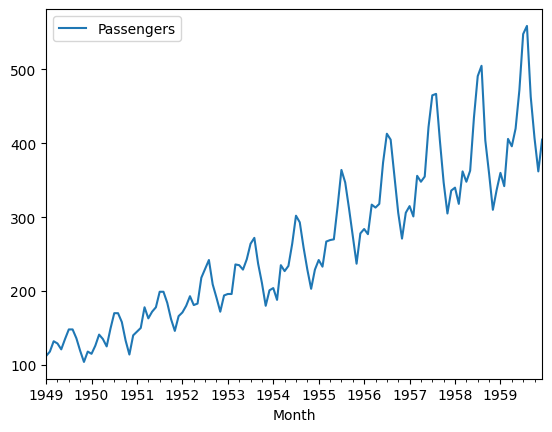

In [ ]:
train_df.set_index("Month").plot()

<Axes: xlabel='Month'>

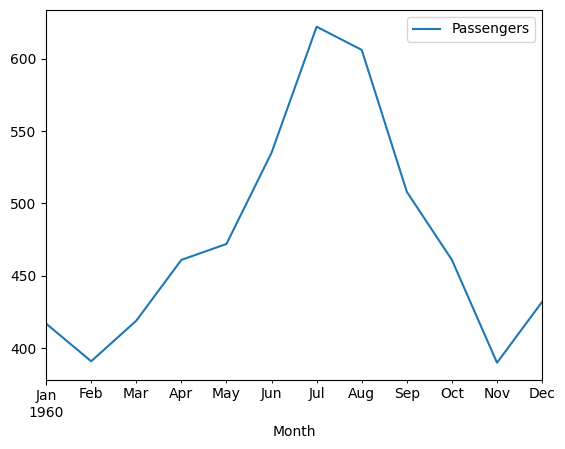

In [ ]:
test_df.set_index("Month").plot()

## Prophet 기본 사용법

### 데이터 셋 준비

Prophet은 시간을 나타내는 컬럼은 ds, 값을 나타내는 컬럼은 y라는 이름으로 지정해주어야 합니다.

In [ ]:
train_df = train_df.rename(columns={"Month": "ds", "Passengers": "y"})
test_df = test_df.rename(columns={"Month": "ds", "Passengers": "y"})

### 모델 생성 및 학습

In [ ]:
model = Prophet()

In [ ]:
model.fit(train_df)

09:52:09 - cmdstanpy - INFO - Chain [1] start processing
09:52:09 - cmdstanpy - INFO - Chain [1] done processing


### 인퍼런스

미리 예측을 하고자 하는 날짜 범위를 데이터 프레임 형태로 지정해주고, 예측값을 내립니다.

In [ ]:
# placeholder 만들어주기
future = model.make_future_dataframe(periods=12, freq="MS")

In [ ]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-08-01
140,1960-09-01
141,1960-10-01
142,1960-11-01


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.149781,59.338020,112.004591,109.149781,109.149781,-23.941806,-23.941806,-23.941806,-23.941806,-23.941806,-23.941806,0.0,0.0,0.0,85.207975
1,1949-02-01,111.303151,55.235070,105.464906,111.303151,111.303151,-32.484939,-32.484939,-32.484939,-32.484939,-32.484939,-32.484939,0.0,0.0,0.0,78.818212
2,1949-03-01,113.248129,90.881066,142.628099,113.248129,113.248129,3.251589,3.251589,3.251589,3.251589,3.251589,3.251589,0.0,0.0,0.0,116.499719
3,1949-04-01,115.401499,85.106518,135.662012,115.401499,115.401499,-6.103137,-6.103137,-6.103137,-6.103137,-6.103137,-6.103137,0.0,0.0,0.0,109.298362
4,1949-05-01,117.485405,85.774023,137.527917,117.485405,117.485405,-5.275998,-5.275998,-5.275998,-5.275998,-5.275998,-5.275998,0.0,0.0,0.0,112.209407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,467.809286,500.974694,552.582018,467.508923,468.077996,59.333965,59.333965,59.333965,59.333965,59.333965,59.333965,0.0,0.0,0.0,527.143251
140,1960-09-01,470.826523,462.318127,513.204327,470.465090,471.164931,15.133454,15.133454,15.133454,15.133454,15.133454,15.133454,0.0,0.0,0.0,485.959977
141,1960-10-01,473.746429,426.372281,479.077793,473.328064,474.134864,-21.487045,-21.487045,-21.487045,-21.487045,-21.487045,-21.487045,0.0,0.0,0.0,452.259384
142,1960-11-01,476.763665,396.955704,448.405452,476.266692,477.212407,-54.322824,-54.322824,-54.322824,-54.322824,-54.322824,-54.322824,0.0,0.0,0.0,422.440841


### 결과 시각화

검은색 점들은 실제 데이터 관측치, 파란색 선은 모델의 예측 값, 파란색 영역은 신뢰 구간을 의미합니다.

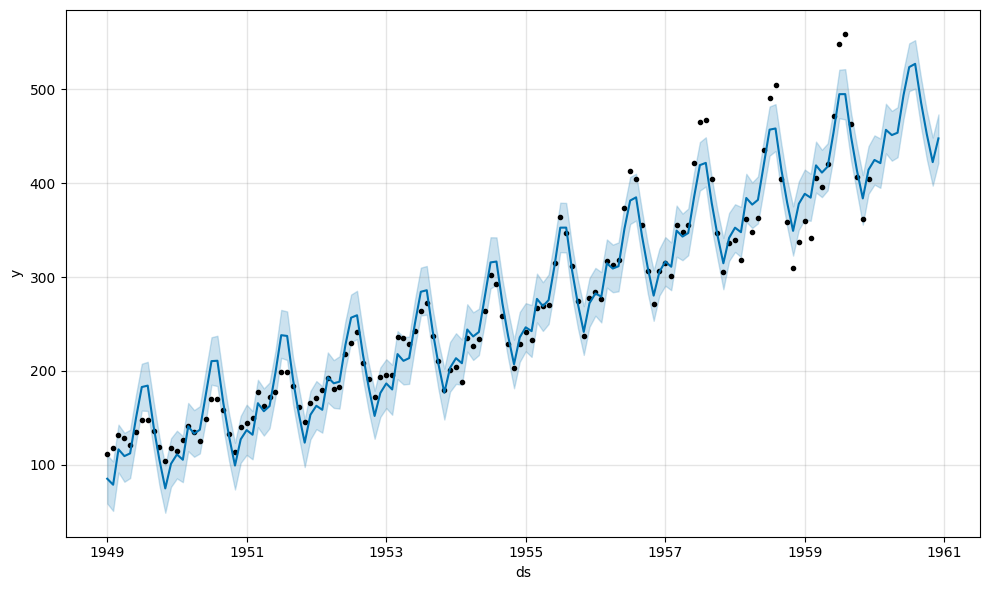

In [ ]:
from matplotlib import pyplot as plt

model.plot(forecast);

plotly를 이용한 시각화를 사용하면 특정 범위를 편하게 확대해서 볼 수 있습니다.

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.149781,59.338020,112.004591,109.149781,109.149781,-23.941806,-23.941806,-23.941806,-23.941806,-23.941806,-23.941806,0.0,0.0,0.0,85.207975
1,1949-02-01,111.303151,55.235070,105.464906,111.303151,111.303151,-32.484939,-32.484939,-32.484939,-32.484939,-32.484939,-32.484939,0.0,0.0,0.0,78.818212
2,1949-03-01,113.248129,90.881066,142.628099,113.248129,113.248129,3.251589,3.251589,3.251589,3.251589,3.251589,3.251589,0.0,0.0,0.0,116.499719
3,1949-04-01,115.401499,85.106518,135.662012,115.401499,115.401499,-6.103137,-6.103137,-6.103137,-6.103137,-6.103137,-6.103137,0.0,0.0,0.0,109.298362
4,1949-05-01,117.485405,85.774023,137.527917,117.485405,117.485405,-5.275998,-5.275998,-5.275998,-5.275998,-5.275998,-5.275998,0.0,0.0,0.0,112.209407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,467.809286,500.974694,552.582018,467.508923,468.077996,59.333965,59.333965,59.333965,59.333965,59.333965,59.333965,0.0,0.0,0.0,527.143251
140,1960-09-01,470.826523,462.318127,513.204327,470.465090,471.164931,15.133454,15.133454,15.133454,15.133454,15.133454,15.133454,0.0,0.0,0.0,485.959977
141,1960-10-01,473.746429,426.372281,479.077793,473.328064,474.134864,-21.487045,-21.487045,-21.487045,-21.487045,-21.487045,-21.487045,0.0,0.0,0.0,452.259384
142,1960-11-01,476.763665,396.955704,448.405452,476.266692,477.212407,-54.322824,-54.322824,-54.322824,-54.322824,-54.322824,-54.322824,0.0,0.0,0.0,422.440841


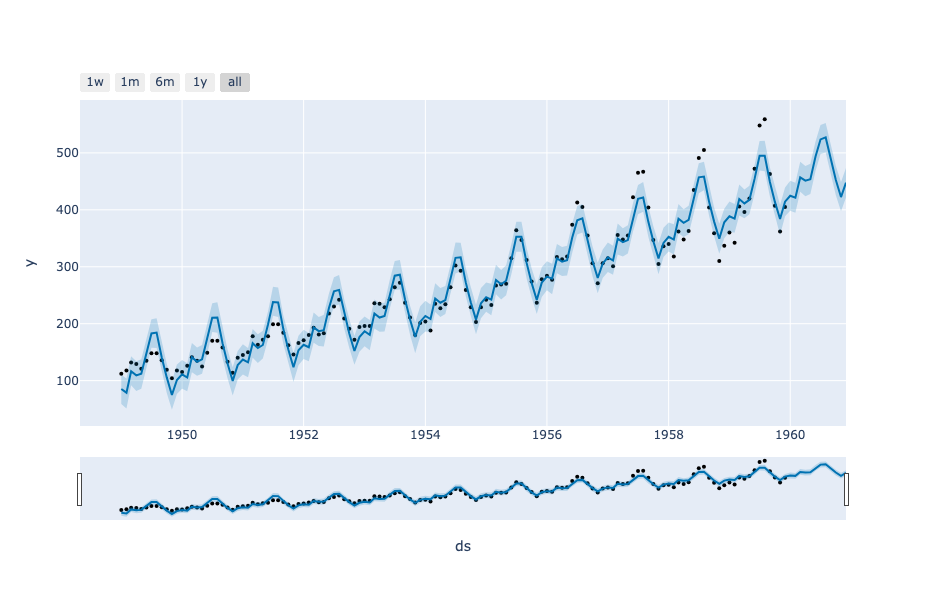

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast)

### 결과 시각화 및 메트릭 측정

In [ ]:
test_df

,y
ds,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [ ]:
forecast = forecast.set_index("ds")["yhat"]

In [ ]:
test_df = test_df.join(forecast)

<Axes: xlabel='ds'>

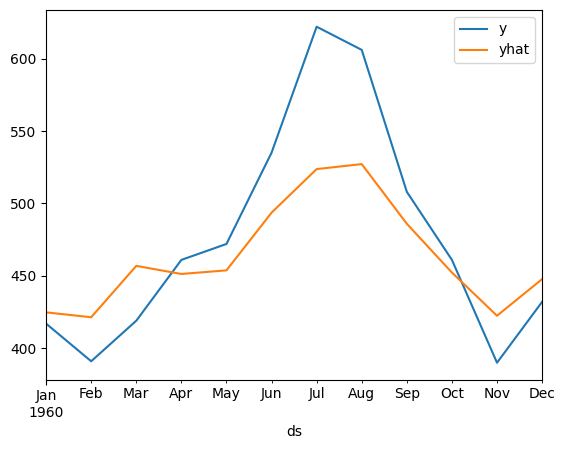

In [ ]:
test_df.plot()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_df["y"], test_df["yhat"], squared=False)
print(f"RMSE: {rmse}")

RMSE: 43.10887744118084


## Prophet Trend

Prophet이 제공해주는 trend 변화 분석 및 시각화 기능을 사용해보겠습니다.

### 추세 변환 지점 시각화

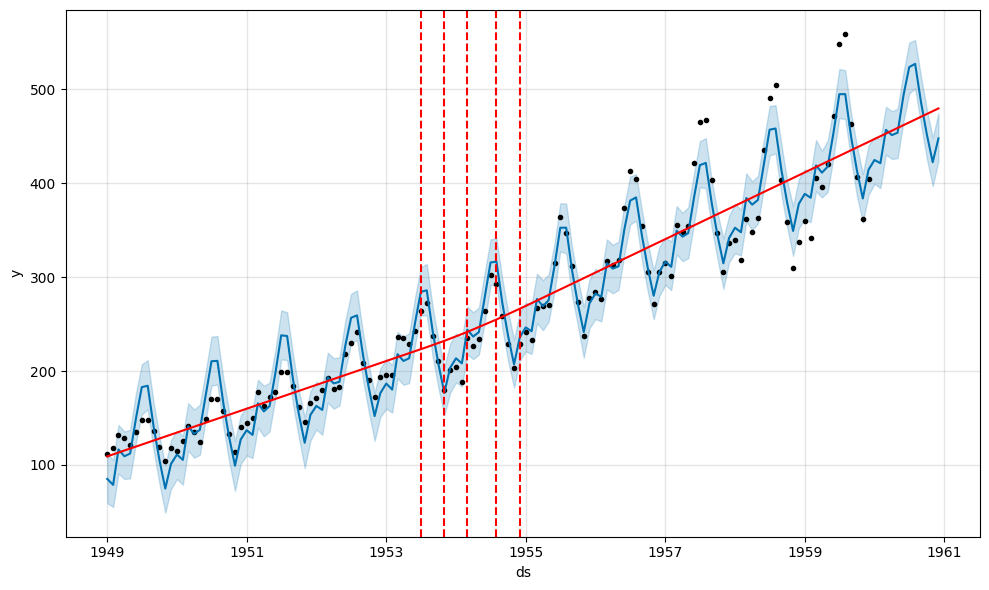

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
_ = add_changepoints_to_plot(fig.gca(), model, forecast)

## Prophet Seasonality

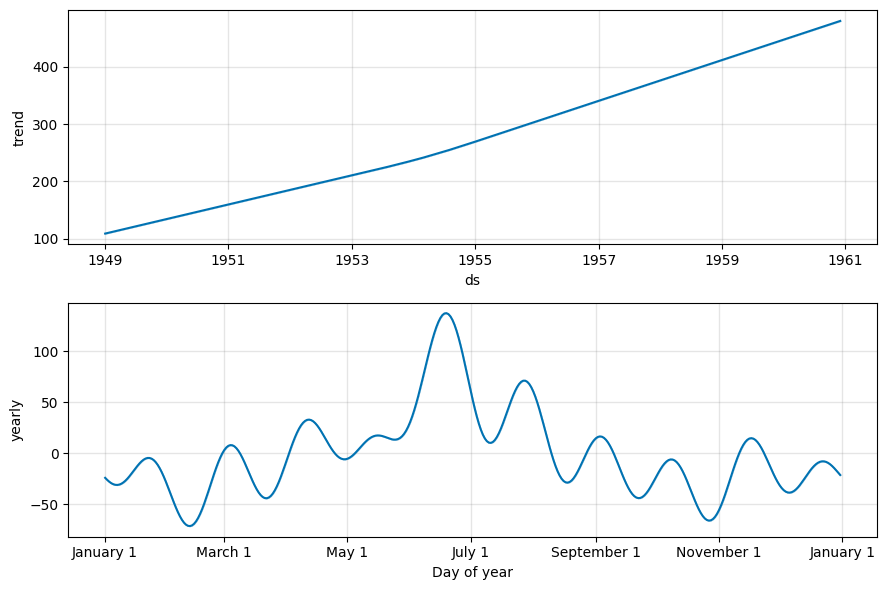

In [ ]:
model.plot_components(forecast);

### Seasonality를 multiplicative로 지정하여 재학습

In [ ]:
model = Prophet(seasonality_mode="multiplicative")
model.fit(train_df)

09:54:49 - cmdstanpy - INFO - Chain [1] start processing
09:54:49 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
forecast = model.predict(future)

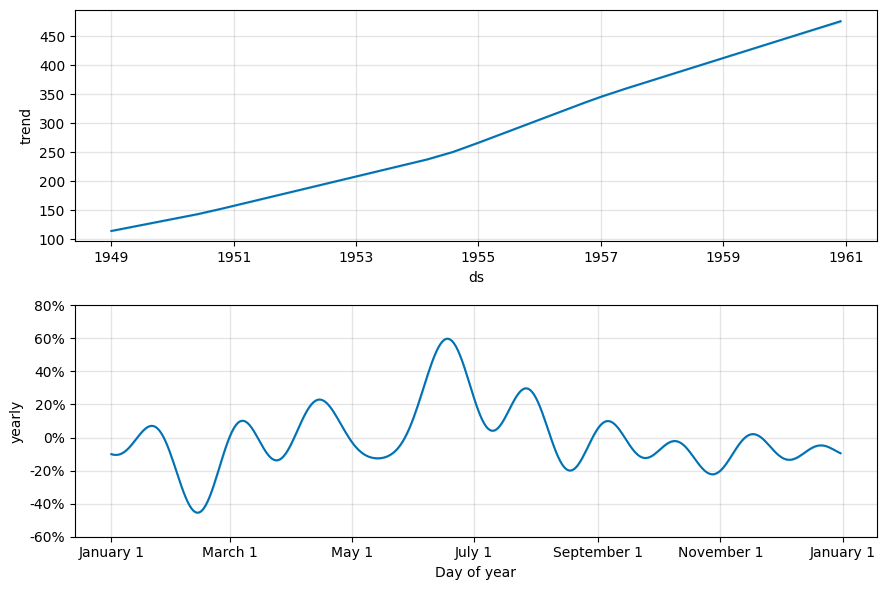

In [ ]:
model.plot_components(forecast);

## 정리

이번 챕터에서는 최신 시계열 데이터 분석 라이브러리인 prophet에 대해서 알아보았습니다. prophet은 상당히 방대한 기능이 내장되어 있는 라이브러리로, 실제 현업에서도 활발히 사용되고 있습니다. 기본적인 사용법을 익힌 뒤, 이전에 배웠던 시계열 분석 기본 지식들을 활용하여 주어진 상황에 맞게 활용하면 좋겠습니다.